In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plot the curves separately

def plot_curve(history):
    loss = history["loss"]
    # val_loss = history["val_loss"]
    accuracy = history["accuracy"]
    # val_accuracy = history["val_accuracy"]

    epochs = range(len(history["loss"]))

    plt.figure()
    plt.plot(epochs, loss, label="training_loss", )
    # plt.plot(epochs, val_loss, label="validation_loss", linestyle='dashed')
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    # plt.plot(epochs, val_accuracy, label="validation_accuracy", linestyle='dashed')
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
!unzip /content/drive/MyDrive/crop_disease/data.zip
# !unzip /content/drive/MyDrive/SIGN_LANG/Code/datax7zip.zip
# !unzip /content/drive/MyDrive/SIGN_LANG/Code/testDatazip.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Client3/Tomato_Early_Blight/17d051ce-efe1-486e-b5ed-b71b1317a9f0___RS_Erly.B 9614.JPG  
  inflating: data/Client3/Tomato_Early_Blight/1829d517-53ae-48a9-b721-5043dd10d0d2___RS_Erly.B 9518.JPG  
  inflating: data/Client3/Tomato_Early_Blight/1863e110-8422-400b-89a6-f0ef457659cc___RS_Erly.B 6462.JPG  
  inflating: data/Client3/Tomato_Early_Blight/1873e09f-31fd-4612-920a-861fac1af687___RS_Erly.B 7797.JPG  
  inflating: data/Client3/Tomato_Early_Blight/18815a60-8297-46e0-922f-e6a0fea818ef___RS_Erly.B 7808.JPG  
  inflating: data/Client3/Tomato_Early_Blight/18a21f42-8794-4665-8174-b0ccd3758af8___RS_Erly.B 7650.JPG  
  inflating: data/Client3/Tomato_Early_Blight/18d8f15c-4948-4506-ae09-54169f95cf36___RS_Erly.B 7496.JPG  
  inflating: data/Client3/Tomato_Early_Blight/18ec9a60-a4e3-4dd7-805f-fe9eaf526c2f___RS_Erly.B 8405.JPG  
  inflating: data/Client3/Tomato_Early_Blight/1941f5d9-f31f-453e-b07c-3f90da6aa381___RS_Erly.B 8238.J

In [ ]:
train_client1 = "/content/data/Client1"
train_client2 = "/content/data/Client2"
train_client3 = "/content/data/Client3"

In [ ]:
import os
import shutil
import random

# Path to the directory containing the 10 category folders
source_dir = '/content/data/Client3'  # e.g., 'data'
train_dir = '/content/Client3_train'  # e.g., 'train'
test_dir = '/content/Client3_test'  # e.g., 'test'

# Define the train-test split ratio
split_ratio = 0.8

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each category folder in the source directory
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)

    # Ensure it's a directory
    if os.path.isdir(category_path):
        # Get list of all image files in the category
        images = os.listdir(category_path)

        # Shuffle the images to ensure randomness
        random.shuffle(images)

        # Split the images into train and test sets
        split_index = int(len(images) * split_ratio)
        train_images = images[:split_index]
        test_images = images[split_index:]

        # Create category folders in train and test directories
        train_category_dir = os.path.join(train_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        # Move the train images to the train directory
        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_category_dir, img))

        # Move the test images to the test directory
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_category_dir, img))

        print(f"Category: {category} - {len(train_images)} images for training, {len(test_images)} for testing.")

print("Train-test split completed successfully.")

Category: Tomato_Target_Spot - 480 images for training, 120 for testing.
Category: Tomato_Leaf_Mold - 480 images for training, 120 for testing.
Category: Tomato_Bacterial_spot - 344 images for training, 86 for testing.
Category: Tomato_Late_blight - 334 images for training, 84 for testing.
Category: Tomato_Early_Blight - 480 images for training, 120 for testing.
Category: Tomato_Yellow_Leaf_Curl_Virus - 371 images for training, 93 for testing.
Category: Tomato_Healthy - 480 images for training, 120 for testing.
Category: Tomato_Mosaic_Virus - 480 images for training, 120 for testing.
Category: Tomato_Spider_Mite - 480 images for training, 120 for testing.
Category: Tomato_Septoria_Leaf_Spot - 480 images for training, 120 for testing.
Train-test split completed successfully.


In [ ]:
Datagenx = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                              rotation_range=0.2,
                                                              shear_range=0.2,
                                                              zoom_range=0.2,
                                                              width_shift_range=0.2,
                                                              height_shift_range=0.3,
                                                              horizontal_flip=True)

train_client1x = Datagenx.flow_from_directory(directory="/content/Client1_train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

test_client1x = Datagenx.flow_from_directory(directory="/content/Client1_test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

train_client2x = Datagenx.flow_from_directory(directory="/content/Client2_train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

test_client2x = Datagenx.flow_from_directory(directory="/content/Client2_test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

train_client3x = Datagenx.flow_from_directory(directory="/content/Client3_train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

test_client3x = Datagenx.flow_from_directory(directory="/content/Client3_test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

Found 4384 images belonging to 10 classes.
Found 1097 images belonging to 10 classes.
Found 4445 images belonging to 10 classes.
Found 1112 images belonging to 10 classes.
Found 4409 images belonging to 10 classes.
Found 1103 images belonging to 10 classes.


In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub

# def create_model(model_url, number_of_classes):
#   feature_extractor_layer = hub.KerasLayer(
#       model_url,
#       trainable=False,
#       name="feature_extractor_layer"
#   )

#   # Create a functional model instead of Sequential
#   input_tensor = tf.keras.Input(shape=(224, 224, 3))
#   x = feature_extractor_layer(input_tensor)  # Pass the input through the feature extractor
#   output_tensor = tf.keras.layers.Dense(
#       number_of_classes, activation="softmax", name="output_layer"
#   )(x)
#   model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

#   return model

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"

pixels = 224

IMAGE_SIZE = (pixels, pixels)

BATCH_SIZE = 16

In [ ]:
do_fine_tuning = False

# model = tf.keras.Sequential([
#     # Explicitly define the input shape so the model can be properly
#     # loaded by the TFLiteConverter
#     tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
#     hub.KerasLayer(model_handle, trainable=do_fine_tuning),
#     tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Dense(10,
#                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
# ])
# model.build((None,)+IMAGE_SIZE+(3,))

model_1 = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    # Wrap the KerasLayer in a Lambda layer
    # tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_handle, trainable=do_fine_tuning)(x)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model_1.build((None,)+IMAGE_SIZE+(3,))

In [ ]:
model_1.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
model1_client1 = model_1.fit(train_client1x, test_client1x,
                   epochs = 25,
                   steps_per_epoch = len(train_client1))

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [ ]:
model_1.save('/content/drive/MyDrive/crop_disease/model_client_1.keras')

In [ ]:
do_fine_tuning = False

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    # Wrap the KerasLayer in a Lambda layer
    # tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_handle, trainable=do_fine_tuning)(x)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model_2.build((None,)+IMAGE_SIZE+(3,))

model_2.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
model1_client2 = model_2.fit(train_client2x,
                   epochs = 25,
                   steps_per_epoch = len(train_client1))

Epoch 1/25
21/21 [==============================] - 12s 375ms/step - loss: 2.2064 - accuracy: 0.2500
Epoch 2/25
21/21 [==============================] - 8s 380ms/step - loss: 1.4135 - accuracy: 0.5625
Epoch 3/25
21/21 [==============================] - 8s 380ms/step - loss: 1.2704 - accuracy: 0.6607
Epoch 4/25
21/21 [==============================] - 8s 371ms/step - loss: 1.1762 - accuracy: 0.6979
Epoch 5/25
21/21 [==============================] - 8s 381ms/step - loss: 1.1455 - accuracy: 0.7024
Epoch 6/25
21/21 [==============================] - 8s 375ms/step - loss: 1.1013 - accuracy: 0.7277
Epoch 7/25
21/21 [==============================] - 8s 373ms/step - loss: 1.0640 - accuracy: 0.7530
Epoch 8/25
21/21 [==============================] - 8s 376ms/step - loss: 1.0720 - accuracy: 0.7545
Epoch 9/25
21/21 [==============================] - 8s 367ms/step - loss: 1.0437 - accuracy: 0.7604
Epoch 10/25
21/21 [==============================] - 8s 374ms/step - loss: 1.0415 - accuracy: 0.787

In [ ]:
model_2.save('/content/drive/MyDrive/crop_disease/model_client_2.keras')

In [ ]:
do_fine_tuning = False

model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    # Wrap the KerasLayer in a Lambda layer
    # tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_handle, trainable=do_fine_tuning)(x)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model_3.build((None,)+IMAGE_SIZE+(3,))

model_3.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
model1_client3 = model_3.fit(train_client3x,
                   epochs = 25,
                   steps_per_epoch = len(train_client1))

Epoch 1/25
21/21 [==============================] - 13s 367ms/step - loss: 2.1543 - accuracy: 0.2634
Epoch 2/25
21/21 [==============================] - 8s 383ms/step - loss: 1.5400 - accuracy: 0.5551
Epoch 3/25
21/21 [==============================] - 8s 376ms/step - loss: 1.3910 - accuracy: 0.6012
Epoch 4/25
21/21 [==============================] - 8s 370ms/step - loss: 1.2305 - accuracy: 0.6949
Epoch 5/25
21/21 [==============================] - 8s 381ms/step - loss: 1.2181 - accuracy: 0.7098
Epoch 6/25
21/21 [==============================] - 8s 381ms/step - loss: 1.2314 - accuracy: 0.7009
Epoch 7/25
21/21 [==============================] - 8s 367ms/step - loss: 1.1078 - accuracy: 0.7634
Epoch 8/25
21/21 [==============================] - 8s 372ms/step - loss: 1.1469 - accuracy: 0.7277
Epoch 9/25
21/21 [==============================] - 8s 379ms/step - loss: 1.1203 - accuracy: 0.7574
Epoch 10/25
21/21 [==============================] - 8s 365ms/step - loss: 1.0673 - accuracy: 0.787

In [ ]:
model_3.save('/content/drive/MyDrive/crop_disease/model_client_3.keras')

model1_client1
model1_client2
model1_client3


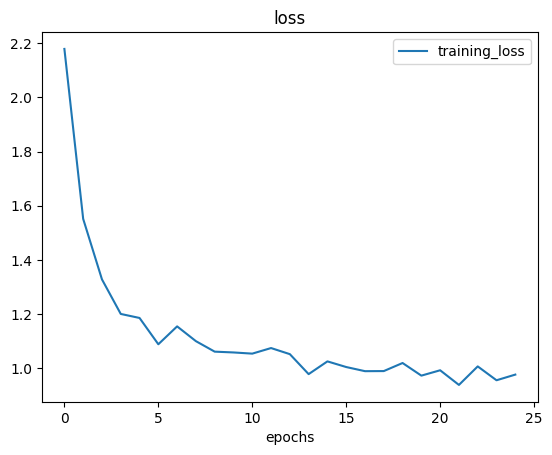

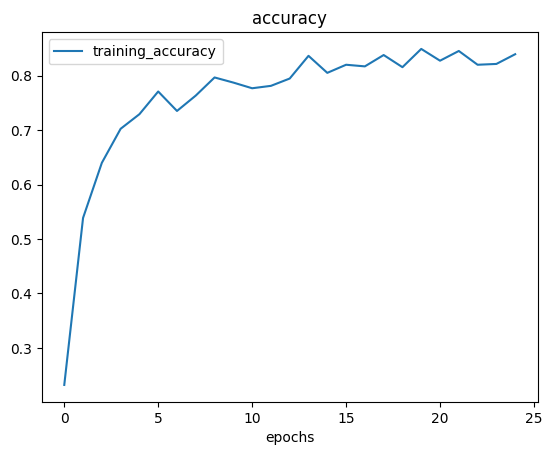

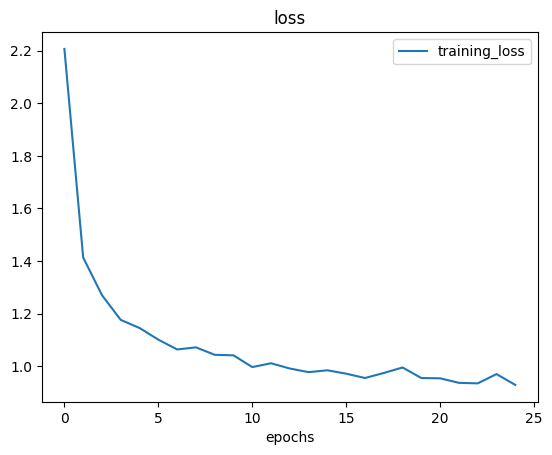

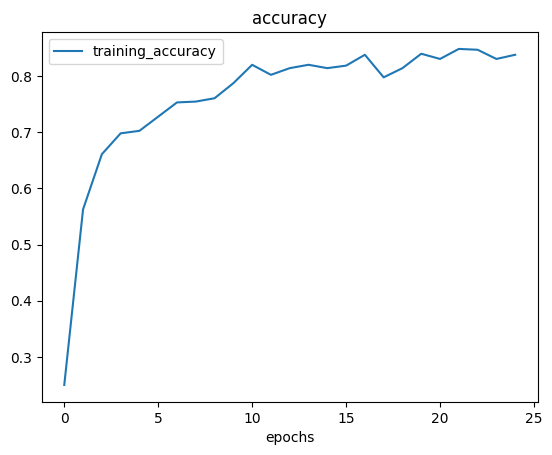

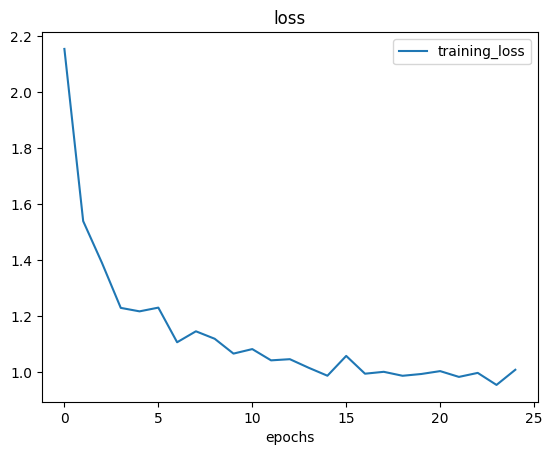

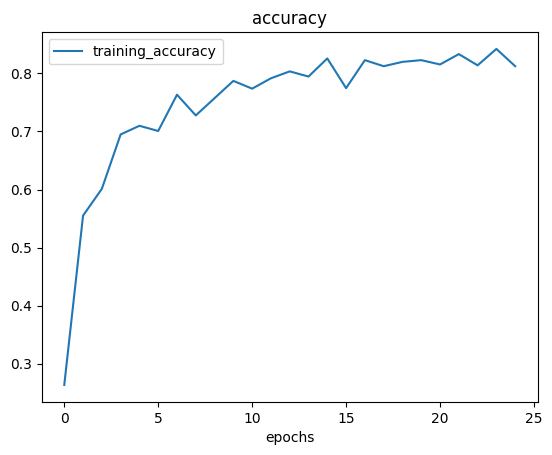

In [ ]:
print("model1_client1")
plot_curve(model1_client1.history)
print("model1_client2")
plot_curve(model1_client2.history)
print("model1_client3")
plot_curve(model1_client3.history)